## 1. Thuộc tính phụ thuộc
1. radius_mean: Trung bình bán kính u bướu.
-> Bán kính trung bình

2. texture_mean: Trung bình độ nhám bề mặt u.
-> Độ nhám trung bình

3. perimeter_mean: Trung bình chu vi u.
-> Chu vi trung bình

4. area_mean: Trung bình diện tích u.
-> Diện tích trung bình

5. smoothness_mean: Độ trơn láng trung bình (biến thiên cục bộ của bán kính).
-> Độ trơn láng trung bình

6. compactness_mean: Trung bình độ đặc (chu vi² / diện tích - 1.0).
-> Độ đặc trung bình

7. concavity_mean: Trung bình độ lõm của u (độ lún của bề mặt u).
-> Độ lõm trung bình

8. concave points_mean: Trung bình số điểm lõm trên bề mặt u.
-> Điểm lõm trung bình

9. symmetry_mean: Trung bình độ đối xứng của u.
-> Độ đối xứng trung bình

10. fractal_dimension_mean: Trung bình kích thước fractal (đo lường độ phức tạp của đường viền).
-> Kích thước fractal trung bình

11. radius_se: Sai số chuẩn của bán kính.
-> Sai số chuẩn bán kính

12. texture_se: Sai số chuẩn của độ nhám.
-> Sai số chuẩn độ nhám

13. perimeter_se: Sai số chuẩn của chu vi.
-> Sai số chuẩn chu vi

14. area_se: Sai số chuẩn của diện tích.
-> Sai số chuẩn diện tích

15. smoothness_se: Sai số chuẩn độ trơn láng.
-> Sai số chuẩn độ trơn láng

16. compactness_se: Sai số chuẩn độ đặc.
-> Sai số chuẩn độ đặc

17. concavity_se: Sai số chuẩn độ lõm.
-> Sai số chuẩn độ lõm

18. concave points_se: Sai số chuẩn số điểm lõm.
-> Sai số chuẩn điểm lõm

19. symmetry_se: Sai số chuẩn độ đối xứng.
-> Sai số chuẩn độ đối xứng

20. fractal_dimension_se: Sai số chuẩn kích thước fractal.
-> Sai số chuẩn kích thước fractal

21. adius_worst: Bán kính lớn nhất (xấu nhất) của u.
-> Bán kính lớn nhất

22. texture_worst: Độ nhám lớn nhất của u.
-> Độ nhám lớn nhất

23. perimeter_worst: Chu vi lớn nhất của u.
-> Chu vi lớn nhất

24. area_worst: Diện tích lớn nhất của u.
-> Diện tích lớn nhất

25. smoothness_worst: Độ trơn láng lớn nhất của u.
-> Độ trơn láng lớn nhất

26. compactness_worst: Độ đặc lớn nhất của u.
-> Độ đặc lớn nhất

27. concavity_worst: Độ lõm lớn nhất của u.
-> Độ lõm lớn nhất

28. concave points_worst: Số điểm lõm lớn nhất của u.
-> Điểm lõm lớn nhất

29. symmetry_worst: Độ đối xứng lớn nhất của u.
-> Độ đối xứng lớn nhất

30. fractal_dimension_worst: Kích thước fractal lớn nhất của u.
-> Kích thước fractal lớn nhất

## 2. Cột chẩn đoán:
diagnosis: Kết quả chẩn đoán.
-> Chẩn đoán: 1 = Malignant (Ác tính), 0 = Benign (Lành tính)

In [34]:
print(data.iloc[1])

diagnosis                  1.00000
radius_mean               20.57000
texture_mean              17.77000
perimeter_mean           132.90000
area_mean               1326.00000
smoothness_mean            0.08474
compactness_mean           0.07864
concavity_mean             0.08690
concave points_mean        0.07017
radius_se                  0.54350
perimeter_se               3.39800
area_se                   74.08000
concavity_se               0.01860
radius_worst              24.99000
texture_worst             23.41000
perimeter_worst          158.80000
area_worst              1956.00000
smoothness_worst           0.12380
compactness_worst          0.18660
concavity_worst            0.24160
concave points_worst       0.18600
symmetry_worst             0.27500
Name: 1, dtype: float64


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
)

# Đọc file CSV
data = pd.read_csv("data/breast_cancer.csv")

In [33]:
# Bỏ cột id
data = data.drop(
    [
        "id",
        "concave points_se",
        "symmetry_mean",
        "fractal_dimension_mean",
        "symmetry_se",
        "smoothness_se",
        "texture_se",
        "fractal_dimension_worst",
        "compactness_se",
        "fractal_dimension_se",
    ],
    axis=1,
)

# Chuyển đổi cột 'diagnosis': M -> 1, B -> 0
data["diagnosis"] = data["diagnosis"].apply(lambda x: 1 if x == "M" else 0)

# Chia dữ liệu thành biến độc lập (X) và biến phụ thuộc (y)
X = data.drop("diagnosis", axis=1)
y = data["diagnosis"]

# Chia dữ liệu thành tập train và test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Huấn luyện mô hình KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Dự đoán trên tập test
y_pred = knn.predict(X_test_scaled)


# Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Độ chính xác (Accuracy): {accuracy:.2f}")
print(f"Độ chính xác dự đoán dương tính (Precision): {precision:.2f}")
print(f"Tỉ lệ phát hiện các trường hợp dương tính (Recall): {recall:.2f}")
print(f"F1-score: {f1:.2f}")
print(f"Ma trận nhầm lẫn (Confusion Matrix):\n{conf_matrix}")

Độ chính xác (Accuracy): 0.96
Độ chính xác dự đoán dương tính (Precision): 0.95
Tỉ lệ phát hiện các trường hợp dương tính (Recall): 0.95
F1-score: 0.95
Ma trận nhầm lẫn (Confusion Matrix):
[[69  2]
 [ 2 41]]


In [27]:
print(data.iloc[1])

diagnosis                  1.00000
radius_mean               20.57000
texture_mean              17.77000
perimeter_mean           132.90000
area_mean               1326.00000
smoothness_mean            0.08474
compactness_mean           0.07864
concavity_mean             0.08690
concave points_mean        0.07017
radius_se                  0.54350
perimeter_se               3.39800
area_se                   74.08000
concavity_se               0.01860
radius_worst              24.99000
texture_worst             23.41000
perimeter_worst          158.80000
area_worst              1956.00000
smoothness_worst           0.12380
compactness_worst          0.18660
concavity_worst            0.24160
concave points_worst       0.18600
symmetry_worst             0.27500
Name: 1, dtype: float64


In [24]:
# Dự đoán trên một mẫu từ tập test (lấy mẫu đầu tiên trong tập test)
sample_index = 0  # bạn có thể thay đổi chỉ số này để chọn mẫu khác
sample_data = X_test_scaled[sample_index].reshape(1, -1)
sample_prediction = knn.predict(sample_data)

print("Dự đoán: ", sample_prediction)
print(
    f"Dự đoán cho mẫu thứ {sample_index + 1}: {'M (Malignant)' if sample_prediction[0] == 1 else 'B (Benign)'}"
)
print(
    f"Giá trị thực tế: {'M (Malignant)' if y_test.iloc[sample_index] == 1 else 'B (Benign)'}"
)

Dự đoán:  [0]
Dự đoán cho mẫu thứ 1: B (Benign)
Giá trị thực tế: B (Benign)


In [18]:
import numpy as np

# Khai báo một dữ liệu mẫu (giả sử bạn biết các giá trị đặc trưng cần nhập)
# Dữ liệu phải có cùng số đặc trưng như X (ví dụ: số cột của X_train là bao nhiêu, mảng này cũng phải có bấy nhiêu giá trị)
sample_data = np.array(
    [
        [
            15.0,
            14.0,
            85.0,
            550.0,
            0.1,
            0.2,
            0.1,
            0.05,
            0.15,
            0.06,
            0.4,
            0.6,
            2.5,
            20.0,
            0.005,
            0.01,
            0.015,
            0.005,
            0.02,
            0.003,
            17.0,
            17.0,
            115.0,
            800.0,
            0.15,
            0.3,
            0.2,
            0.1,
            0.25,
            0.08,
        ]
    ]
)

# Chuẩn hóa dữ liệu mẫu giống như tập huấn luyện
sample_data_scaled = scaler.transform(sample_data)

# Dự đoán kết quả cho dữ liệu mới
sample_prediction = knn.predict(sample_data_scaled)

# In ra kết quả dự đoán
print("Dự đoán: ", sample_prediction)
print(
    f"Dự đoán cho mẫu dữ liệu mới: {'M (Malignant - ác tính)' if sample_prediction[0] == 1 else 'B (Benign - lành tính)'}"
)

Dự đoán:  [0]
Dự đoán cho mẫu dữ liệu mới: B (Benign - lành tính)


c:\Users\KIKIp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
import joblib

# Lưu scaler
joblib.dump(scaler, "models/model_normalize/breast_cancer.pkl")

# Lưu mô hình KNN
joblib.dump(knn, "models/model_predict/breast_cancer.pkl")

['../models/predict/Knn_Ungthuvu21.pkl']

Xem mức độ quan trọng của các thuộc tính

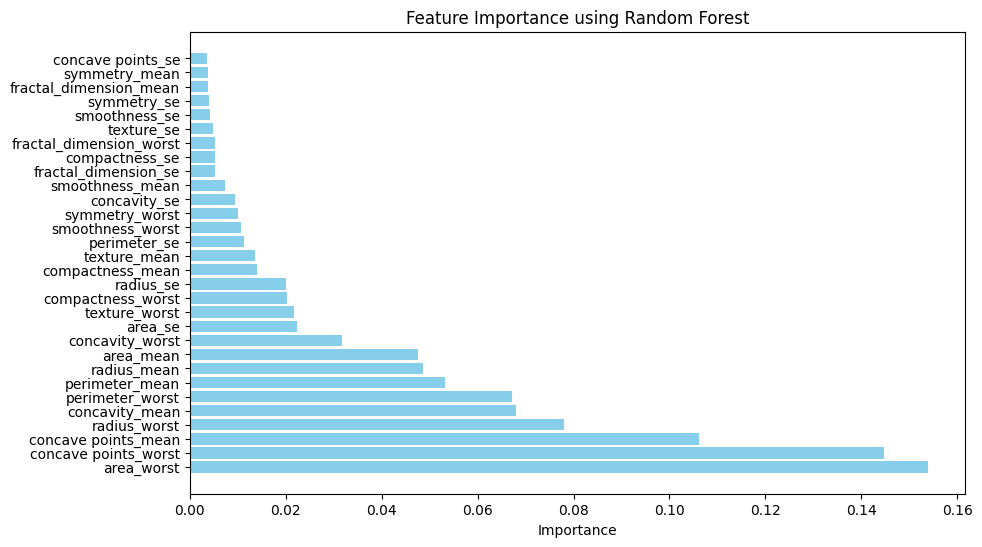

                    Feature  Importance
23               area_worst    0.153892
27     concave points_worst    0.144663
7       concave points_mean    0.106210
20             radius_worst    0.077987
6            concavity_mean    0.068001
22          perimeter_worst    0.067115
2            perimeter_mean    0.053270
0               radius_mean    0.048703
3                 area_mean    0.047555
26          concavity_worst    0.031802
13                  area_se    0.022407
21            texture_worst    0.021749
25        compactness_worst    0.020266
10                radius_se    0.020139
5          compactness_mean    0.013944
1              texture_mean    0.013591
12             perimeter_se    0.011303
24         smoothness_worst    0.010644
28           symmetry_worst    0.010120
16             concavity_se    0.009386
4           smoothness_mean    0.007285
19     fractal_dimension_se    0.005321
15           compactness_se    0.005253
29  fractal_dimension_worst    0.005210


In [21]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import pandas as pd

# Huấn luyện mô hình Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)

# Lấy độ quan trọng của các thuộc tính
feature_importances = rf.feature_importances_

# Tạo DataFrame để lưu trữ độ quan trọng
features = X.columns
importance_df = pd.DataFrame({"Feature": features, "Importance": feature_importances})

# Sắp xếp theo độ quan trọng
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# Vẽ biểu đồ độ quan trọng
plt.figure(figsize=(10, 6))
plt.barh(importance_df["Feature"], importance_df["Importance"], color="skyblue")
plt.xlabel("Importance")
plt.title("Feature Importance using Random Forest")
plt.show()

# In ra độ quan trọng
print(importance_df)